In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("netflix_data.csv", parse_dates=["watch_date"])
df.head()


,user_id,show_title,genre,watch_date,duration_watched,user_rating
0,U050,House of Cards,Political,2025-06-11 00:14:48,138,5
1,U031,Friends,Comedy,2024-12-19 03:43:48,97,2
2,U019,The Witcher,Fantasy,2025-01-26 21:30:48,41,3
3,U046,Breaking Bad,Drama,2025-04-01 17:33:48,165,1
4,U046,Dark,Mystery,2025-05-14 04:14:48,95,5


In [3]:
df.isnull().sum()

user_id             0
show_title          0
genre               0
watch_date          0
duration_watched    0
user_rating         0
dtype: int64

In [4]:
df.describe(include='all')

,user_id,show_title,genre,watch_date,duration_watched,user_rating
count,250,250,250,250,250.00000,250.00000
unique,50,15,10,NaN,NaN,NaN
top,U012,The Crown,Drama,NaN,NaN,NaN
freq,10,23,47,NaN,NaN,NaN
mean,NaN,NaN,NaN,2025-03-12 00:47:26.880000,100.56000,2.99600
min,NaN,NaN,NaN,2024-12-17 07:12:48,20.00000,1.00000
25%,NaN,NaN,NaN,2025-01-26 03:04:33,66.25000,2.00000
50%,NaN,NaN,NaN,2025-03-04 08:18:48,102.00000,3.00000
75%,NaN,NaN,NaN,2025-04-30 19:24:48,138.00000,4.00000
max,NaN,NaN,NaN,2025-06-14 22:37:48,180.00000,5.00000


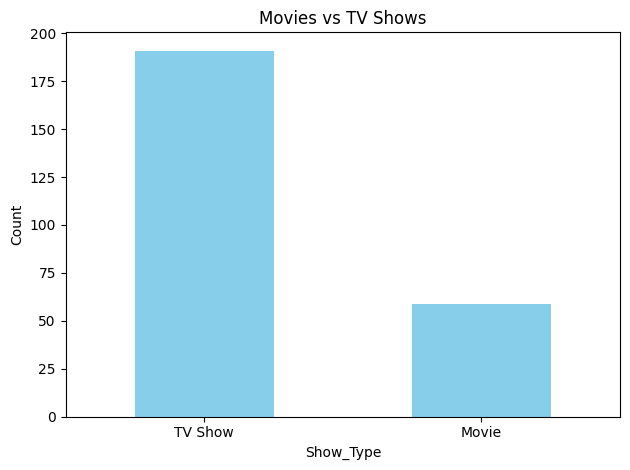

In [ ]:
df['Show_Type'] = df['duration_watched'].apply(lambda x: 'TV Show' if x >= 60 else 'Movie')
df['Show_Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Movies vs TV Shows")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


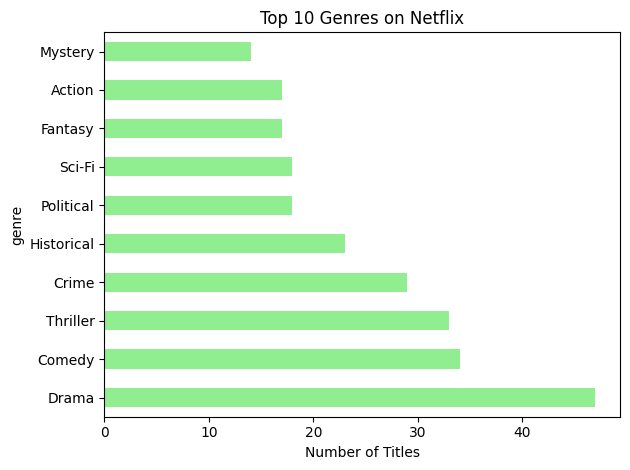

In [13]:
top_genres = df['genre'].value_counts().head(10)
top_genres.plot(kind='barh', color='lightgreen')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

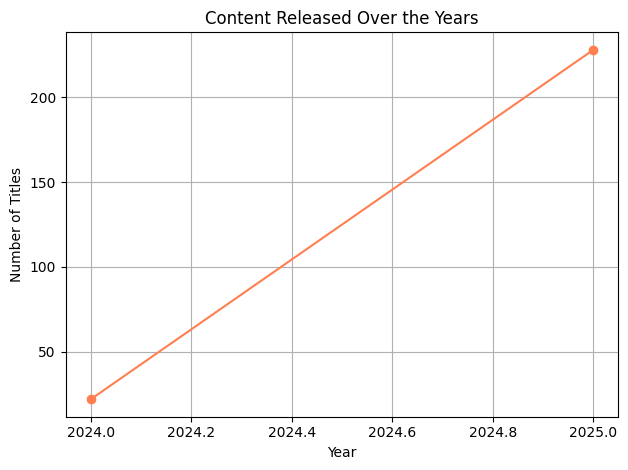

In [15]:
df['release_year'] = df['watch_date'].dt.year
year_counts = df['release_year'].value_counts().sort_index()
year_counts.plot(kind='line', marker='o', color='coral')
plt.title("Content Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

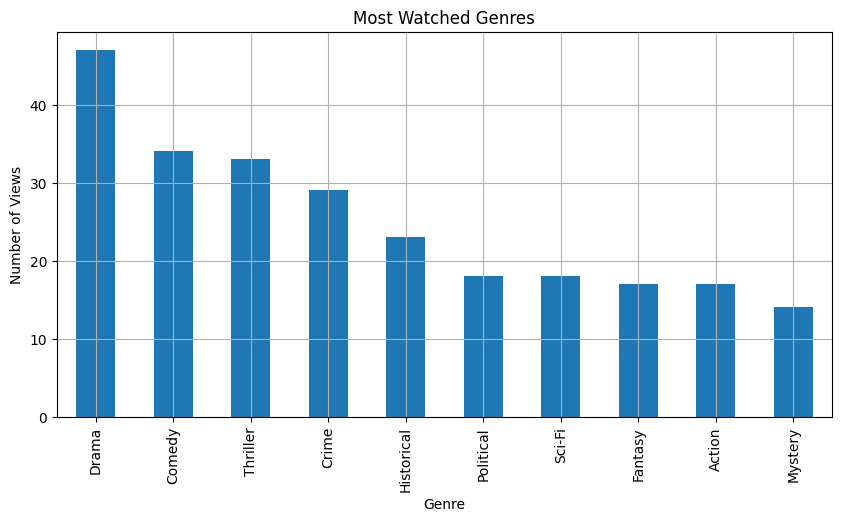

In [ ]:
genre_count = df['genre'].value_counts()
genre_count.plot(kind='bar', title='Most Watched Genres', figsize=(10,5))
plt.xlabel('Genre')
plt.ylabel('Number of Views')
plt.grid(True)
plt.show()


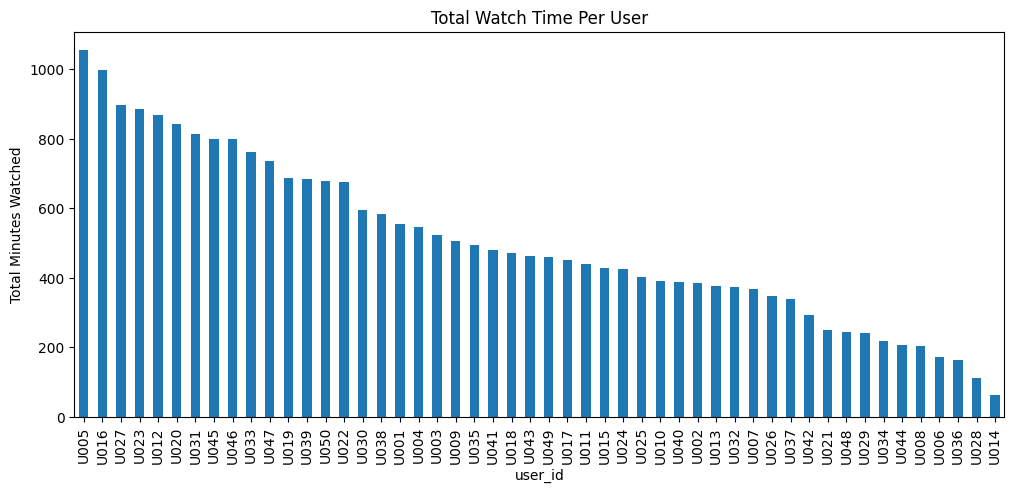

In [ ]:
user_watch = df.groupby('user_id')['duration_watched'].sum().sort_values(ascending=False)
user_watch.plot(kind='bar', figsize=(12,5), title='Total Watch Time Per User')
plt.ylabel('Total Minutes Watched')
plt.show()


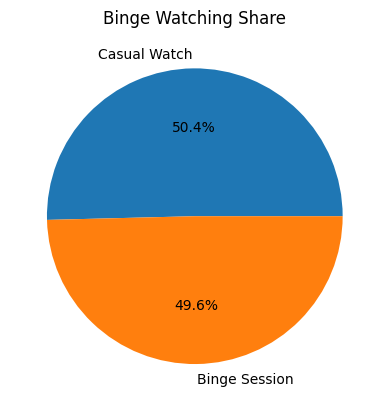

In [ ]:
df['binge'] = df['duration_watched'] > 100
binge_count = df['binge'].value_counts()
binge_count.plot(kind='pie', labels=['Casual Watch', 'Binge Session'], autopct='%1.1f%%', title='Binge Watching Share')
plt.ylabel('')
plt.show()


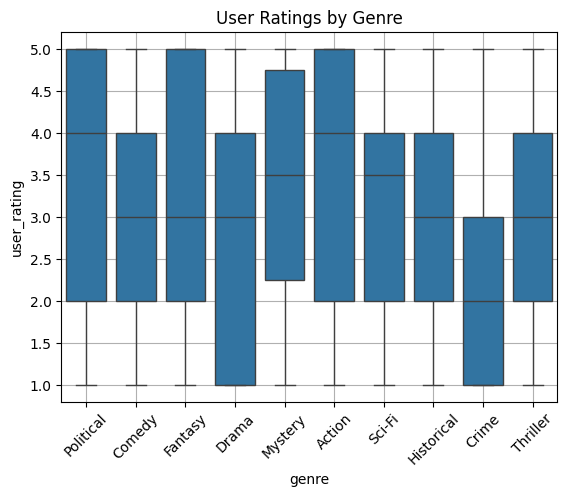

In [ ]:
sns.boxplot(data=df, x='genre', y='user_rating')
plt.xticks(rotation=45)
plt.title('User Ratings by Genre')
plt.grid(True)
plt.show()
